In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings

In [6]:
warnings.filterwarnings('ignore')

In [7]:
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

In [8]:
df = pd.read_csv('data/cleaned_zomato_data.csv')

In [9]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775.0,800,Buffet
1,Spice Elephant,Yes,No,4.1,787.0,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918.0,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88.0,300,Buffet
4,Grand Village,No,No,3.8,166.0,600,Buffet


# 1 dataset overview

In [10]:
df.shape

(148, 7)

so we have 148 observations and 7 variabels

In [11]:
df.dtypes

name                            object
online_order                    object
book_table                      object
rate                           float64
votes                          float64
approx_cost(for two people)      int64
listed_in(type)                 object
dtype: object

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    float64
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(2), int64(1), object(4)
memory usage: 8.2+ KB


# 2 univariate analysis - numerical variables

In [13]:
numerical_cols = ['rate', 'votes', 'approx_cost(for two people)']

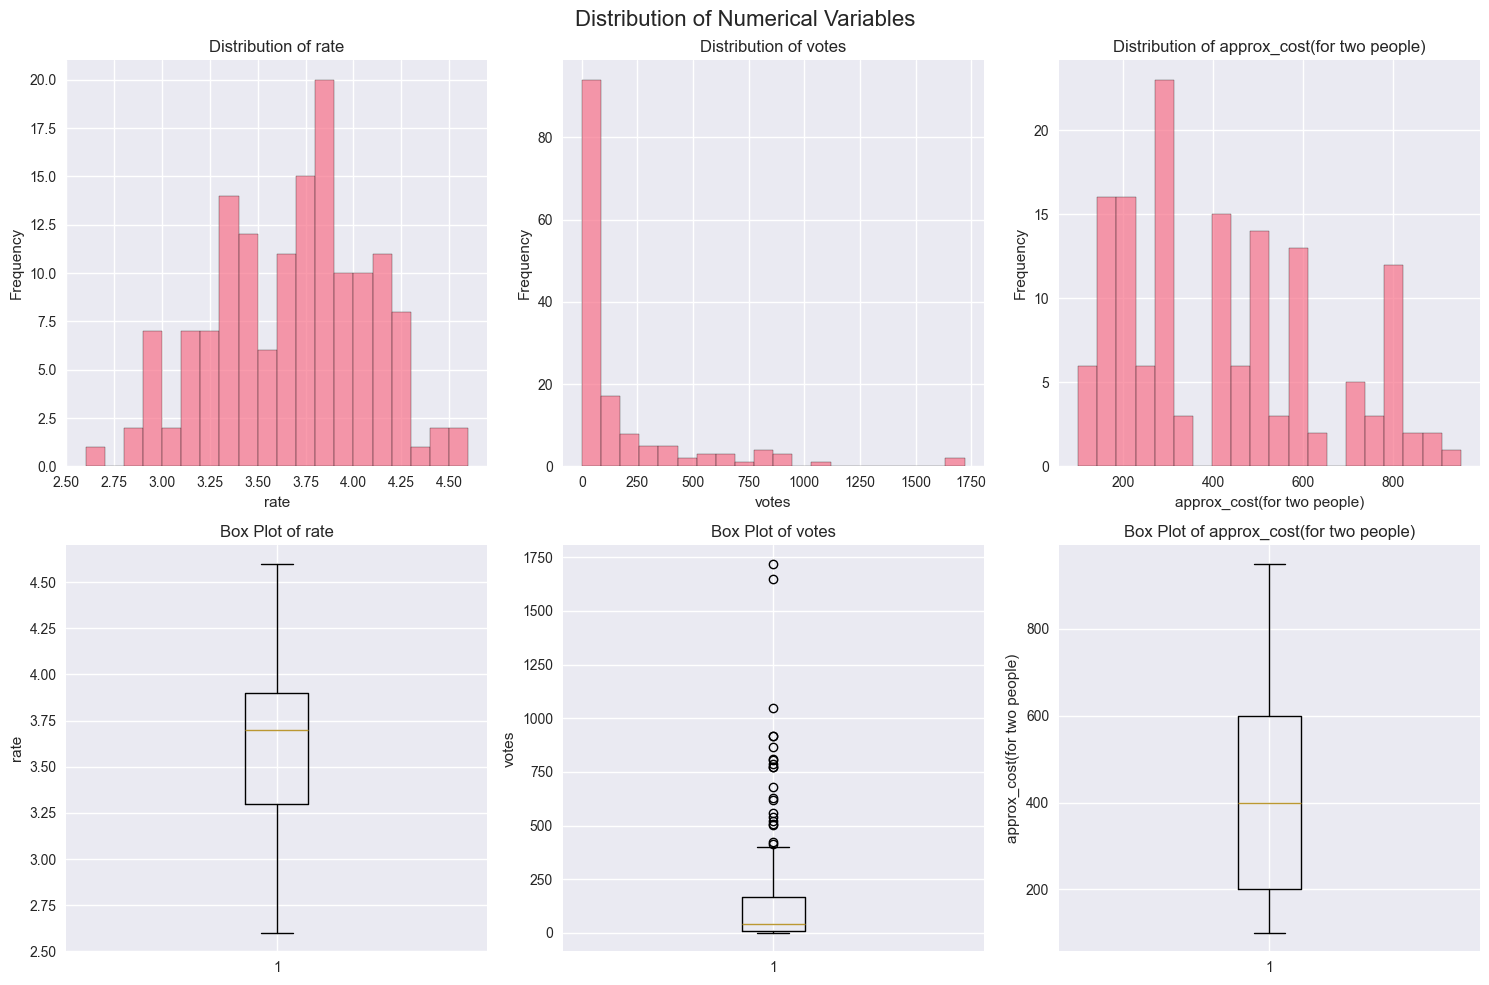

In [15]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Distribution of Numerical Variables', fontsize=16)

for i, col in enumerate(numerical_cols):
    # Histogram
    axes[0, i].hist(df[col], bins=20, alpha=0.7, edgecolor='black')
    axes[0, i].set_title(f'Distribution of {col}')
    axes[0, i].set_xlabel(col)
    axes[0, i].set_ylabel('Frequency')

    # Box plot
    axes[1, i].boxplot(df[col])
    axes[1, i].set_title(f'Box Plot of {col}')
    axes[1, i].set_ylabel(col)

plt.tight_layout()
plt.show()

**histogram** shows the distribution of the numerical variables, while **box plots** help identify outliers and the spread of the data.
1) The **rate** variable has a sort of normal distribution with a slight right skew, indicating that most restaurants have ratings between 3.5 and 4.25
2) The **votes** variable is right-skewed, with most restaurants receiving fewer than 100 votes, but a few have significantly higher counts and also have a large a number outliers
3) The **approx_cost(for two people)** variable is sort of right-skewed, with most restaurants having costs below 400$, but some high-end restaurants have costs exceeding 800$

# 3. categorical variables analysis

In [16]:
categorical_cols = ['online_order', 'book_table', 'listed_in(type)']

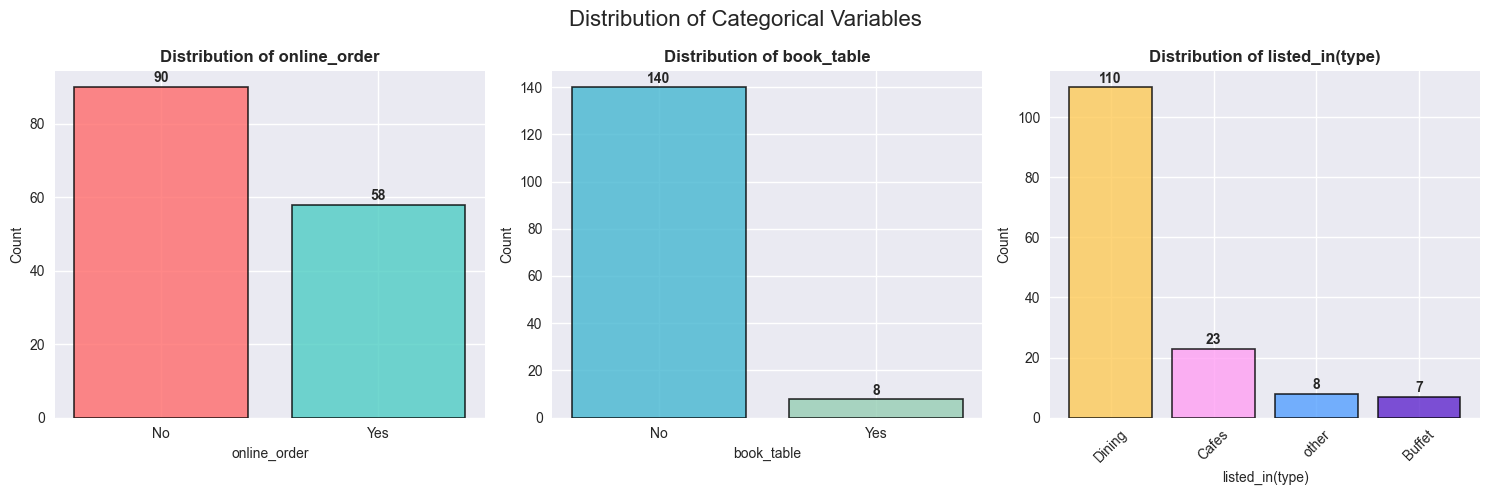

In [22]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Distribution of Categorical Variables', fontsize=16)

# Define different color palettes for each chart
color_palettes = [
    ['#FF6B6B', '#4ECDC4'],  # Red and Teal for online_order
    ['#45B7D1', '#96CEB4'],  # Blue and Green for book_table
    ['#FECA57', '#FF9FF3', '#54A0FF', '#5F27CD', '#00D2D3']  # Multiple colors for restaurant types
]

for i, col in enumerate(categorical_cols):
    value_counts = df[col].value_counts()

    # Use different colors for each bar
    colors = color_palettes[i][:len(value_counts)]

    bars = axes[i].bar(value_counts.index, value_counts.values,
                       alpha=0.8, edgecolor='black', color=colors, linewidth=1.2)

    axes[i].set_title(f'Distribution of {col}', fontsize=12, fontweight='bold')
    axes[i].set_xlabel(col, fontsize=10)
    axes[i].set_ylabel('Count', fontsize=10)

    # Add count labels on top of each bar
    for bar, count in zip(bars, value_counts.values):
        height = bar.get_height()
        axes[i].text(bar.get_x() + bar.get_width()/2., height + 0.5,
                    f'{int(count)}', ha='center', va='bottom', fontweight='bold')

    # Rotate x-axis labels if needed (especially for restaurant types)
plt.tight_layout()
plt.show()




In [23]:
# Print value counts
for col in categorical_cols:
    print(f"\n{col} distribution:")
    print(df[col].value_counts())
    print(f"Percentage distribution:")
    print(df[col].value_counts(normalize=True) * 100)



online_order distribution:
online_order
No     90
Yes    58
Name: count, dtype: int64
Percentage distribution:
online_order
No     60.810811
Yes    39.189189
Name: proportion, dtype: float64

book_table distribution:
book_table
No     140
Yes      8
Name: count, dtype: int64
Percentage distribution:
book_table
No     94.594595
Yes     5.405405
Name: proportion, dtype: float64

listed_in(type) distribution:
listed_in(type)
Dining    110
Cafes      23
other       8
Buffet      7
Name: count, dtype: int64
Percentage distribution:
listed_in(type)
Dining    74.324324
Cafes     15.540541
other      5.405405
Buffet     4.729730
Name: proportion, dtype: float64


## Interpretation

### Online Order Distribution
- **60.8% don't offer online ordering** vs 39.2% that do
- Traditional dining still dominates but digital adoption is growing
- Significant opportunity for restaurants to expand online presence

### Table Booking Distribution
- **94.6% don't offer table reservations** - heavily skewed distribution
- Only 5.4% have booking systems - major untapped market
- Suggests either casual dining focus or limited technology adoption

### Restaurant Type Distribution
- **Dining restaurants dominate** at 74.3% of establishments
- **Cafes represent** 15.5% - solid secondary category
- **Buffets and others** under 6% each - niche markets

### Key Takeaways
The data reveals a **traditional restaurant landscape** with significant opportunities for digital transformation. Most establishments are full-service dining restaurants operating with minimal digital services, suggesting this dataset captures more traditional, possibly local restaurants rather than modern quick-service chains.

**Business implications**: 90 restaurants could potentially add online ordering, and 140 could implement table booking systems.

### 4. Correlation Analysis

In [24]:
correlation_matrix = df[numerical_cols].corr()
correlation_matrix

,rate,votes,approx_cost(for two people)
rate,1.000000,0.404053,0.275216
votes,0.404053,1.000000,0.377900
approx_cost(for two people),0.275216,0.377900,1.000000


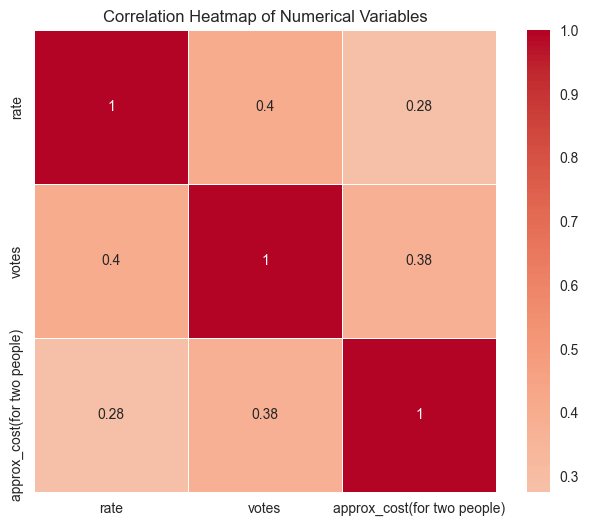

In [25]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()


## interpretation
- **Rating and Votes**: Moderate positive correlation (0.4) suggests that rating and voters are somewhat related, meaning restaurants with higher ratings tend to receive more votes, but it's not a strong relationship, there may be other factors influencing votes.
- **Rating and Cost**: Weak positive correlation (0.28) indicates that rate and cost aren't strongly related, meaning higher-rated restaurants don't necessarily have higher costs.
- **Votes and Cost**: Weak positive correlation (0.38) suggests that restaurants with more votes tend to have higher costs, but again, the relationship isn't very strong. So there may be other factors influencing the number of votes a restaurant receives.

# 5. Bivariate Analysis

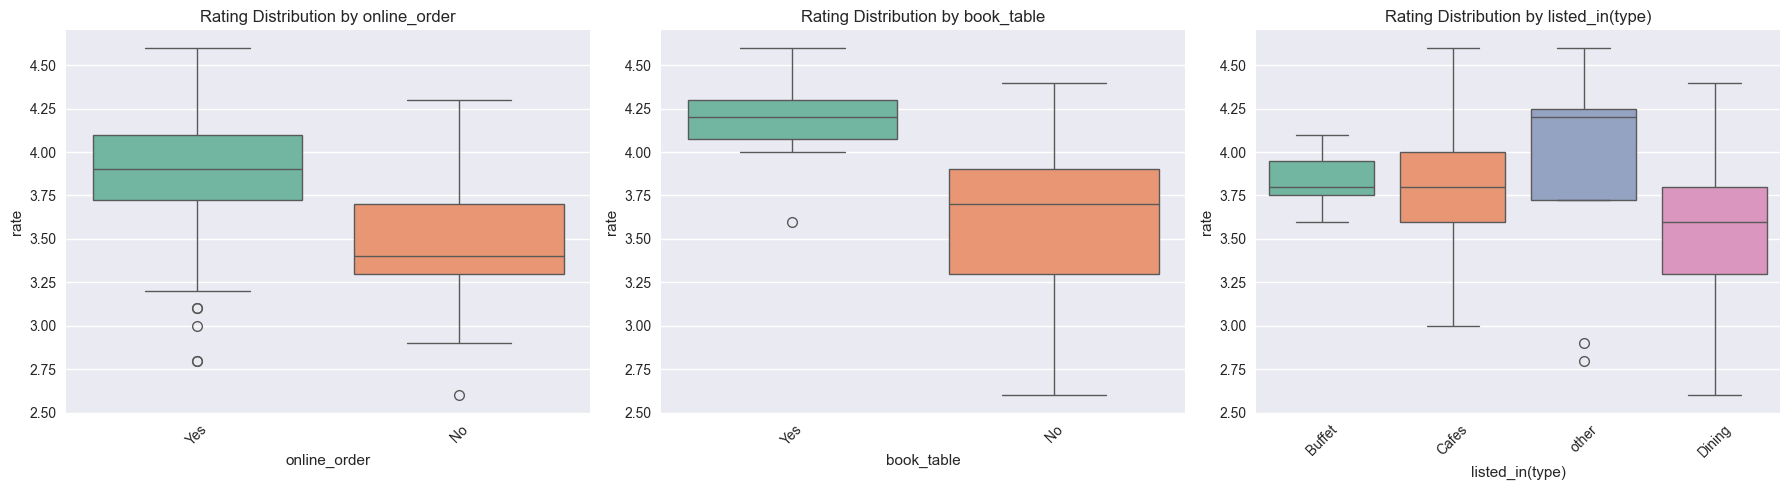

In [27]:
# Rating analysis by categorical variables
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, cat_col in enumerate(['online_order', 'book_table', 'listed_in(type)']):
    sns.boxplot(data=df, x=cat_col, y='rate', ax=axes[i], palette='Set2')
    axes[i].set_title(f'Rating Distribution by {cat_col}')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

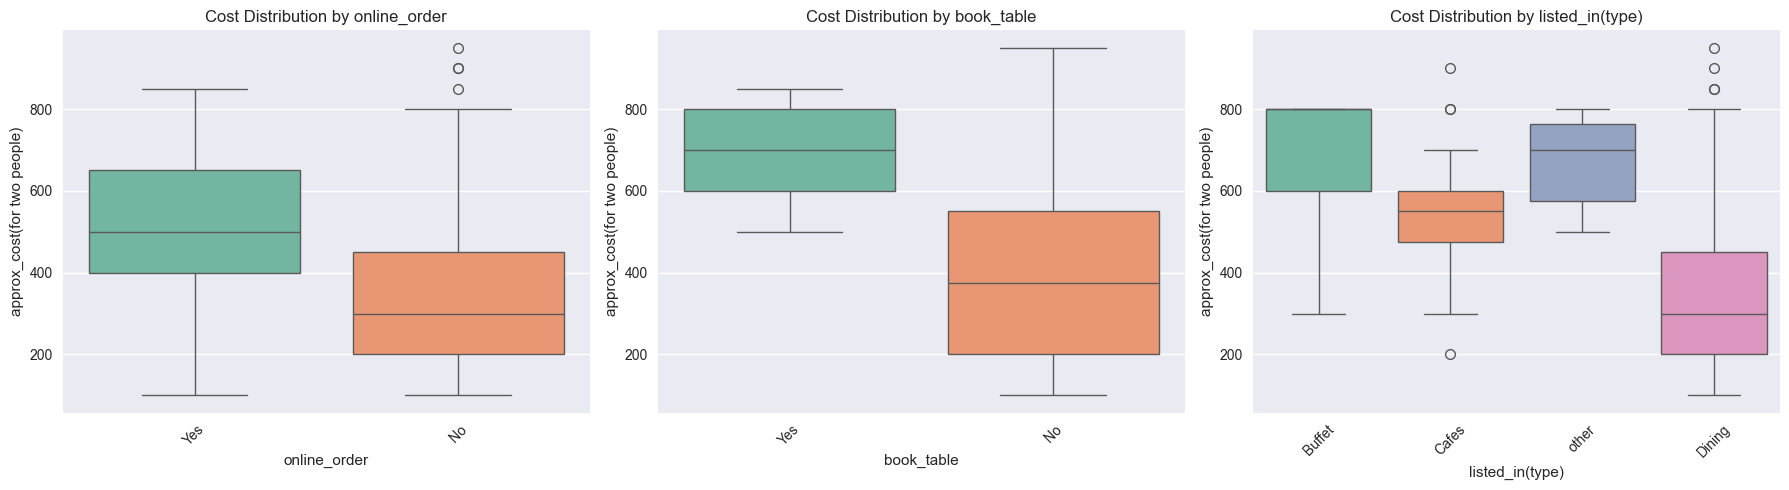

In [29]:
# Cost analysis by categorical variables
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, cat_col in enumerate(['online_order', 'book_table', 'listed_in(type)']):
    sns.boxplot(data=df, x=cat_col, y='approx_cost(for two people)', ax=axes[i], palette='Set2')
    axes[i].set_title(f'Cost Distribution by {cat_col}')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


# **Box Plot Summary**

## **1. Online Order**
- **Ratings**: Yes (≈3.75) > No (≈3.50); Yes more variable
- **Costs**: Yes (≈400) > No (≈350); No has high outliers (≈900)

## **2. Table Booking**
- **Ratings**: Yes (≈4.25) >> No (≈3.75); Yes less variable
- **Costs**: Yes (≈550) >> No (≈300); wider range for Yes

## **3. Establishment Type**
- **Ratings**: Buffet (≈4.00) > Others (≈3.75); Dining low outliers
- **Costs**: Buffet (≈600) > Dining (≈400) > Others (≈300); Dining high outliers

## **Trends**
- Online & booking → higher ratings/costs
- Buffets top both; Dining has luxury outliers

# 6. Scatter Plot Analysis

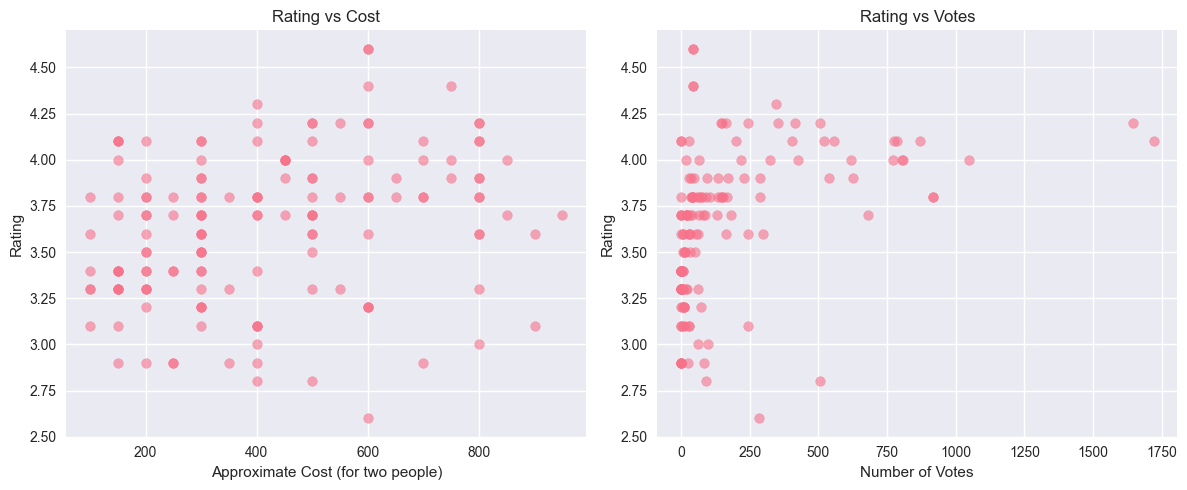

In [30]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Rating vs Cost
axes[0].scatter(df['approx_cost(for two people)'], df['rate'], alpha=0.6)
axes[0].set_xlabel('Approximate Cost (for two people)')
axes[0].set_ylabel('Rating')
axes[0].set_title('Rating vs Cost')

# Rating vs Votes
axes[1].scatter(df['votes'], df['rate'], alpha=0.6)
axes[1].set_xlabel('Number of Votes')
axes[1].set_ylabel('Rating')
axes[1].set_title('Rating vs Votes')

plt.tight_layout()
plt.show()


there is no clear linear relationship between the variables, but we can see some trends:
- **Rating vs Cost**: Some restaurants with higher costs have better ratings, but many low-cost restaurants also have high ratings. This suggests that cost does not directly determine rating.
- **Rating vs Votes**: Restaurants with more votes tend to have higher ratings, but there are many restaurants with high ratings and low votes, indicating that popularity does not always correlate with quality.

# 10. ADVANCED VISUALIZATIONS

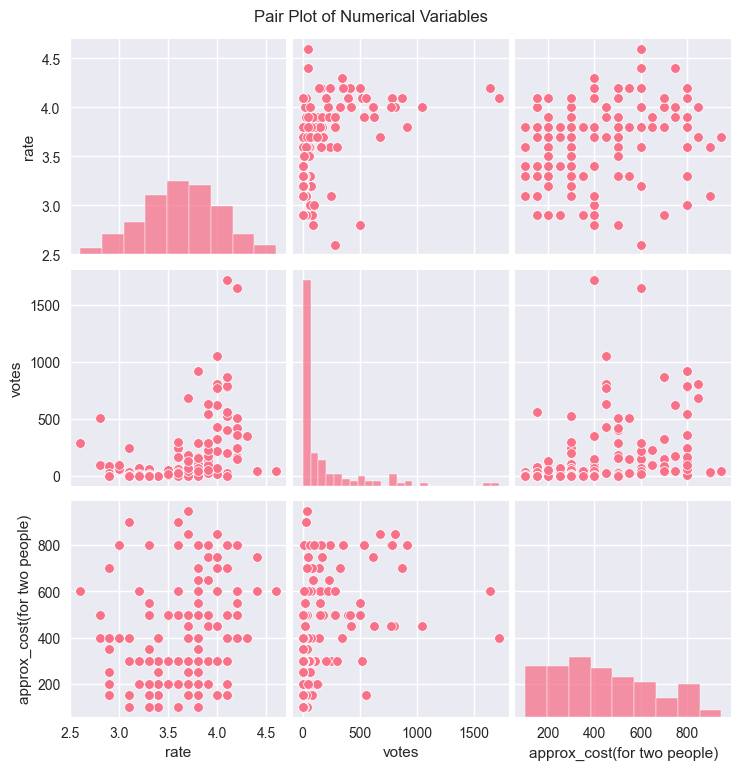

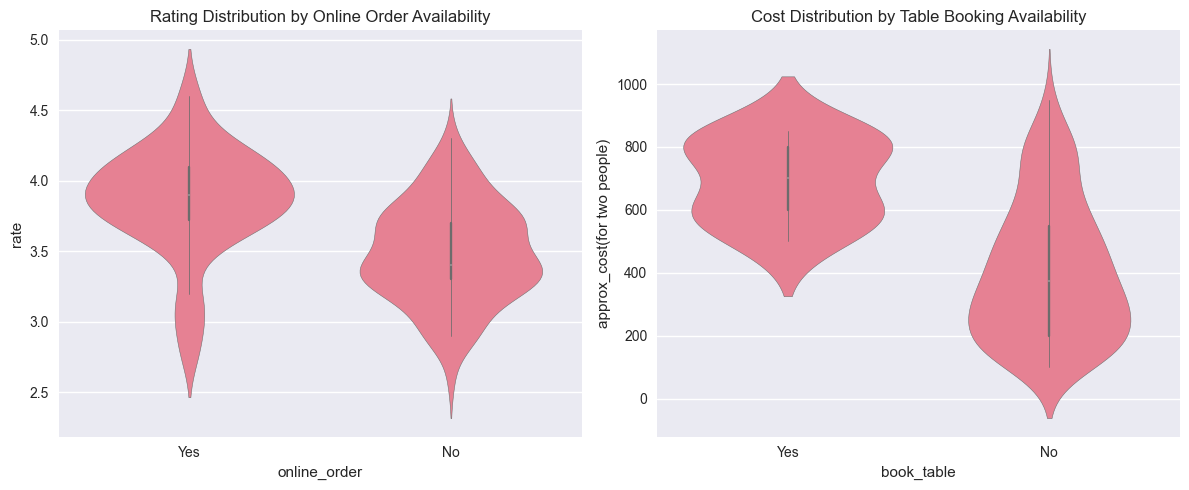

In [34]:
# Pair plot for numerical variables
sns.pairplot(df[numerical_cols])
plt.suptitle('Pair Plot of Numerical Variables', y=1.02)
plt.show()

# Violin plots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.violinplot(data=df, x='online_order', y='rate', ax=axes[0])
axes[0].set_title('Rating Distribution by Online Order Availability')

sns.violinplot(data=df, x='book_table', y='approx_cost(for two people)', ax=axes[1])
axes[1].set_title('Cost Distribution by Table Booking Availability')

plt.tight_layout()
plt.show()


# **Violin Plot Summary**

## **1. Rating Distribution by Online Order Availability**
- **Yes**: Median ≈4.0, wide distribution (3.0-4.5)
- **No**: Median ≈3.5, narrower distribution (3.0-4.0)
- **Inference**: Restaurants with online ordering tend to have higher and more varied ratings.

## **2. Cost Distribution by Table Booking Availability**
- **Yes**: Median ≈600, wide distribution (200-1000)
- **No**: Median ≈300, narrower distribution (0-600)
- **Inference**: Table booking availability is associated with higher and more variable costs.

## **Combined Trends**
- Online ordering boosts ratings, while table booking increases costs.
- Greater variability in both ratings and costs is observed where these services are offered.

# **OVERALL CONCLUSIONS & KEY INSIGHTS**

## **Dataset Overview**
This analysis examined **148 restaurants** across 7 key variables, revealing insights about the restaurant landscape, digital adoption, and customer preferences.

---

## **Major Findings**

### **1. Digital Transformation Opportunity**
- **60.8%** of restaurants lack online ordering capabilities
- **94.6%** don't offer table booking services
- **Business Implication**: Massive untapped potential for digital services adoption

### **2. Market Composition**
- **Dining establishments dominate** (74.3%) - traditional full-service restaurants
- **Cafes** represent a solid secondary market (15.5%)
- **Buffets and specialty types** are niche markets (<6% each)

### **3. Rating Patterns**
- Most restaurants cluster around **3.5-4.0 rating range**
- **Online ordering restaurants** achieve higher ratings (≈3.75 vs 3.50)
- **Table booking restaurants** show premium ratings (≈4.25)
- Rating distribution is relatively narrow, suggesting consistent service quality

### **4. Pricing Insights**
- Average cost: **₹418 for two people**
- **Table booking availability** strongly indicates premium pricing (≈₹550 vs ₹300)
- **Buffet restaurants** command highest average prices (≈₹600)
- Cost range varies widely (₹100-₹950), indicating diverse market segments

### **5. Customer Engagement**
- **Vote distribution is heavily skewed** - most restaurants have <100 votes
- **Higher ratings correlate moderately with more votes** (r=0.4)
- **Cost and popularity** show weak correlation - expensive ≠ popular

---

## **Strategic Insights**

### **Technology Adoption Impact**
- Restaurants with **online ordering** show both higher ratings AND greater variability
- **Table booking** services are strong indicators of premium positioning
- Digital services appear to enable better customer satisfaction

### **Market Segmentation**
1. **Traditional Dining** (74%) - core market, digital transformation opportunity
2. **Casual Cafes** (15%) - secondary market with growth potential
3. **Premium Buffets** (5%) - high-value niche market
4. **Specialty Establishments** (5%) - diverse niche categories

### **Competitive Landscape**
- Market is **relatively homogeneous** in ratings (3.5-4.0 range)
- **Price differentiation** is more significant than quality differentiation
- **Service offerings** (online/booking) create competitive advantages

---

## **Business Recommendations**

### **For Restaurant Owners**
1. **Implement online ordering** - correlates with higher customer ratings
2. **Consider table booking systems** - signals premium positioning
3. **Focus on consistency** - rating distribution suggests quality standardization

### **For Market Analysis**
1. **90 restaurants** could potentially add online ordering
2. **140 restaurants** could implement table booking systems
3. **Significant digital transformation opportunity** exists in this market

### **For Investors/Entrepreneurs**
- **Technology solution providers** have substantial market opportunity
- **Premium positioning** through service enhancement is viable
- **Traditional dining** segment shows most room for innovation

---

## **Final Takeaway**
This dataset reveals a **traditional restaurant market in transition**, where digital services are emerging as key differentiators for customer satisfaction and premium positioning. The vast majority of establishments operate with minimal technology adoption, presenting significant opportunities for digital transformation and market disruption.
